# Project 1: Animal Crossing New Horizons Villagers

author: Rachel Nelson

class: DSC680

In [390]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [391]:
# import data
df = pd.read_csv("D:/College/DSC680/Project 1/data/villagers.csv")
# To display the top 5 rows
df.head(5)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [392]:
# Checking the data type
df.dtypes

# remote duplicate rows
df = df.drop_duplicates()

In [393]:
# drop columns not planning to use
df = df.drop(columns=['Name', 'Birthday','Catchphrase','Furniture List','Unique Entry ID','Filename','Wallpaper','Flooring','Favorite Song'])
df.head(5)

,Species,Gender,Personality,Hobby,Style 1,Style 2,Color 1,Color 2
0,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue
1,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black
2,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White
3,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White
4,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue


In [394]:
# Looking for any null values
print(df.isnull().sum())


Species        0
Gender         0
Personality    0
Hobby          0
Style 1        0
Style 2        0
Color 1        0
Color 2        0
dtype: int64


In [395]:
def getDummies(df):
    '''Creates dummy variables from categorical variables, adds them
    to the dataframe and returns the new dataframe with dummy vars'''
    dummyDF = df.copy()
    catList = dummyDF.select_dtypes(include=['object']).columns.tolist()
    for i in catList:
        dummies = pd.get_dummies(dummyDF[i], prefix=i)
        dummyDF = pd.concat([dummyDF, dummies], axis=1)
    return dummyDF

In [396]:
# Add dummy variable columns to dataframes
df_dummies = getDummies(df)
df_dummies = df_dummies.drop(columns=['Species', 'Gender','Personality','Hobby','Style 1','Style 2','Color 1','Color 2'])
df_dummies.head(5)


,Species_Alligator,Species_Anteater,Species_Bear,Species_Bird,Species_Bull,Species_Cat,Species_Chicken,Species_Cow,Species_Cub,Species_Deer,...,Color 2_Colorful,Color 2_Gray,Color 2_Green,Color 2_Light blue,Color 2_Orange,Color 2_Pink,Color 2_Purple,Color 2_Red,Color 2_White,Color 2_Yellow
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
# Correlation matrix - finding the relations between the variables using dummy variables
df_dummies.corr()

,Species_Alligator,Species_Anteater,Species_Bear,Species_Bird,Species_Bull,Species_Cat,Species_Chicken,Species_Cow,Species_Cub,Species_Deer,...,Color 2_Colorful,Color 2_Gray,Color 2_Green,Color 2_Light blue,Color 2_Orange,Color 2_Pink,Color 2_Purple,Color 2_Red,Color 2_White,Color 2_Yellow
Species_Alligator,1.000000,-0.018229,-0.026967,-0.025039,-0.016855,-0.033754,-0.020724,-0.013726,-0.027889,-0.021874,...,-0.028785,-0.038214,0.045830,-0.032166,-0.032967,-0.034527,0.048220,0.002882,0.072187,-0.042995
Species_Anteater,-0.018229,1.000000,-0.026967,-0.025039,-0.016855,-0.033754,-0.020724,-0.013726,-0.027889,-0.021874,...,-0.028785,-0.038214,-0.034527,-0.032166,-0.032967,0.045830,0.048220,-0.053464,-0.048691,0.023716
Species_Bear,-0.026967,-0.026967,1.000000,-0.037041,-0.024934,-0.049933,-0.030658,-0.020306,-0.041257,-0.032359,...,-0.042583,-0.005718,0.059873,0.011481,0.124584,0.004398,-0.049933,-0.040193,0.053143,-0.063605
Species_Bird,-0.025039,-0.025039,-0.037041,1.000000,-0.023151,-0.046362,-0.028465,-0.018854,-0.038306,-0.030044,...,-0.039538,0.056388,-0.047424,0.019097,0.078531,0.012008,0.014265,0.009912,-0.022179,-0.059056
Species_Bull,-0.016855,-0.016855,-0.024934,-0.023151,1.000000,-0.031209,-0.019162,-0.012692,-0.025786,-0.020225,...,-0.026615,-0.035334,-0.031924,-0.029741,-0.030482,-0.031924,-0.031209,0.072130,-0.045021,-0.039754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color 2_Pink,-0.034527,0.045830,0.004398,0.012008,-0.031924,0.026638,0.031801,0.079891,-0.052822,0.093562,...,-0.054521,-0.072380,-0.065395,-0.060923,-0.062441,1.000000,-0.063931,-0.101263,-0.092223,-0.081435
Color 2_Purple,0.048220,0.048220,-0.049933,0.014265,-0.031209,-0.062500,0.034110,0.082603,0.003227,-0.040502,...,-0.053300,-0.070759,-0.063931,-0.059559,-0.061043,-0.063931,1.000000,-0.098996,-0.090159,-0.079612
Color 2_Red,0.002882,-0.053464,-0.040193,0.009912,0.072130,0.028018,0.038864,0.033992,-0.044080,0.030503,...,-0.084424,-0.112079,-0.101263,-0.094338,-0.096689,-0.101263,-0.098996,1.000000,-0.142806,-0.126100
Color 2_White,0.072187,-0.048691,0.053143,-0.022179,-0.045021,-0.090159,-0.001914,-0.036664,0.087322,-0.007660,...,-0.076888,-0.102073,-0.092223,-0.085917,-0.088058,-0.092223,-0.090159,-0.142806,1.000000,-0.114843


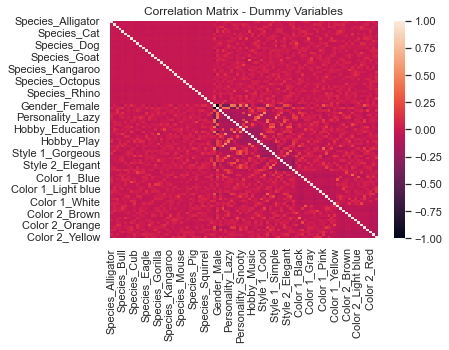

In [398]:
# Correlation heatmap between the variables using dummy variables
ax = sns.heatmap(df_dummies.corr())
ax.set_title('Correlation Matrix - Dummy Variables')
plt.show()

<AxesSubplot:title={'center':'Animal Crossing Species'}>

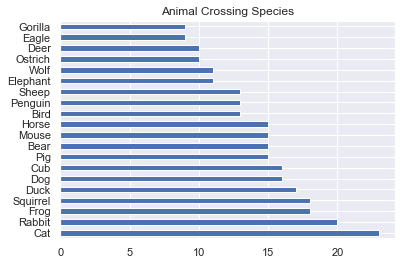

In [399]:
# Bar Plots
df['Species'].value_counts()[:20].plot(kind='barh',title='Animal Crossing Species')

<AxesSubplot:title={'center':'Animal Crossing Gender Balance'}>

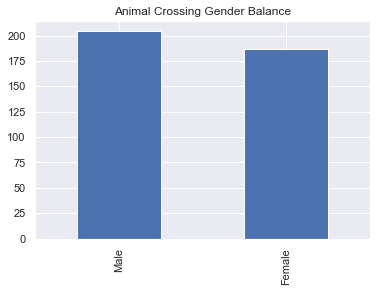

In [400]:
df['Gender'].value_counts()[:20].plot(kind='bar',title='Animal Crossing Gender Balance')

<AxesSubplot:title={'center':'Animal Crossing Personalities'}>

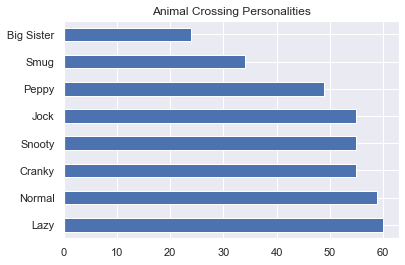

In [401]:
df['Personality'].value_counts()[:20].plot(kind='barh',title='Animal Crossing Personalities')

<AxesSubplot:title={'center':'Animal Crossing Hobbies'}>

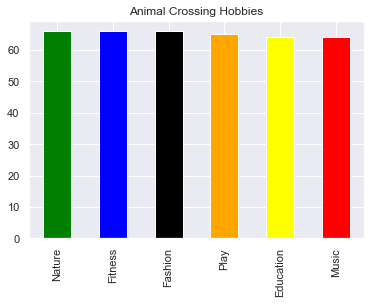

In [402]:
df['Hobby'].value_counts()[:20].plot(kind='bar',title='Animal Crossing Hobbies',
                                     color=['green','blue','black','orange','yellow','red'])

<AxesSubplot:title={'center':'Animal Crossing Primary Styles'}>

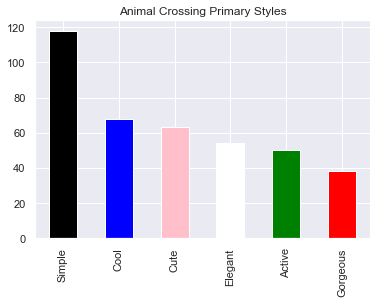

In [403]:
df['Style 1'].value_counts()[:20].plot(kind='bar',title='Animal Crossing Primary Styles',
                                       color=['black','blue','pink','white','green','red'])

<AxesSubplot:title={'center':'Animal Crossing Primary Colors'}>

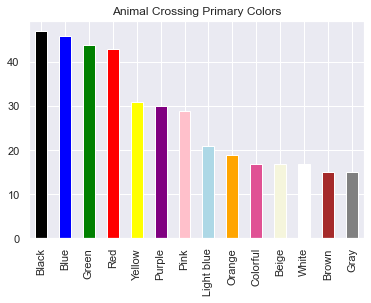

In [404]:
df['Color 1'].value_counts()[:20].plot(kind='bar',
                                       color=['black', 'blue', 'green', 'red', 'yellow','purple','pink','#add8e6',
                                              'orange','#e05194','beige','white','brown','gray'],
                                       title='Animal Crossing Primary Colors')




In [405]:
#Trying Ordinal Encoding for categories
# Load libraries
from sklearn.preprocessing import OrdinalEncoder
# Set up lists of variables and order of their categories
SpeciesVar = ['LotShape']
SpeciesCat = ['Alligator','Anteater','Bear','Bird','Bull','Cat','Chicken','Cow','Cub','Deer','Dog','Duck','Eagle',
              'Elephant','Frog','Goat','Gorilla','Hamster','Hippo','Horse','Kangaroo','Koala','Lion','Monkey','Mouse',
              'Octopus','Ostrich','Penguin','Pig','Rabbit','Rhino','Sheep','Squirrel','Tiger','Wolf']

GenderVar = ['Gender']
GenderCat = ['Male', 'Female']

PersonalityVar = ['Personality']
PersonalityCat = ['Big Sister','Cranky','Jock','Lazy','Normal','Peppy','Smug','Snooty']

HobbyVar = ['Hobby']
HobbyCat = ['Education','Fashion','Fitness','Music','Nature','Play']

Style1Var = ['Style1']
Style1Cat = ['Active','Cool','Cute','Elegant','Gorgeous','Simple']

Style2Var = ['Style2']
Style2Cat = ['Active','Cool','Cute','Elegant','Gorgeous','Simple']

Color1Var = ['Color1']
Color1Cat = ['Beige','Black','Blue','Brown','Colorful','Gray','Green','Light blue','Orange','Pink','Purple','Red',
             'White','Yellow']

Color2Var = ['Color2']
Color2Cat = ['Beige','Black','Blue','Brown','Colorful','Gray','Green','Light blue','Orange','Pink','Purple','Red',
             'White','Yellow']

In [410]:
# ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
ordinal_df = encoder.fit_transform(df)
print(ordinal_df)

ordinal_df = pd.DataFrame(ordinal_df)

ordinal_df = ordinal_df.set_axis(['Species', 'Gender', 'Personality', 'Hobby', 'Style1','Style2','Color1','Color2',
                                  ], axis=1, inplace=False)

ordinal_df.head(5)
ordinal_df.to_csv('ordinal_df.csv',index=True)

[[ 3.  1.  1. ...  1.  1.  2.]
 [32.  0.  5. ...  5.  2.  1.]
 [28.  0.  0. ...  3.  9. 12.]
 ...
 [21.  0.  7. ...  3.  8. 13.]
 [ 9.  1.  6. ...  4. 10.  5.]
 [25.  1.  3. ...  2.  2. 13.]]


In [407]:
# Correlation Matrix of Ordinal Encoding Values
ordinal_df.corr()

,Species,Gender,Personality,Hobby,Style1,Style2,Color1,Color2
Species,1.000000,-0.104357,0.065982,-0.089756,-0.052597,-0.129535,-0.012944,0.035352
Gender,-0.104357,1.000000,-0.453871,0.265013,0.031489,-0.016666,-0.202289,-0.184093
Personality,0.065982,-0.453871,1.000000,-0.286020,0.145240,0.088106,0.012012,0.024117
Hobby,-0.089756,0.265013,-0.286020,1.000000,0.074450,0.006094,-0.047212,0.058157
Style1,-0.052597,0.031489,0.145240,0.074450,1.000000,-0.160484,-0.019639,-0.002115
Style2,-0.129535,-0.016666,0.088106,0.006094,-0.160484,1.000000,0.050611,-0.076981
Color1,-0.012944,-0.202289,0.012012,-0.047212,-0.019639,0.050611,1.000000,-0.086041
Color2,0.035352,-0.184093,0.024117,0.058157,-0.002115,-0.076981,-0.086041,1.000000


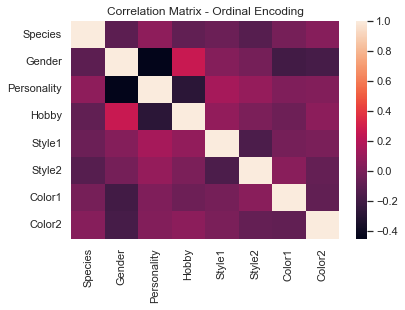

In [408]:
# Correlation Matrix Visual Heatmap of Ordinal Encoding Values
ax = sns.heatmap(ordinal_df.corr())
ax.set_title('Correlation Matrix - Ordinal Encoding')
plt.show()



